In [1]:
import numpy as np

In [2]:
def roll_dice():
    return np.sum(np.random.randint(1, 7, 2))

In [3]:
roll_dice()

11

In [4]:
def monte_carlo_simulation(runs=1000):
    results = np.zeros(2) #two dimesional numpy array
    for _ in range(runs):
        if roll_dice() == 7:
            results[0] += 1
        else:
            results[1] += 1
    return results

In [5]:
monte_carlo_simulation()

array([176., 824.])

In [6]:
results = np.zeros(1000)

for i in range(1000):
    results[i] = monte_carlo_simulation()[0]

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


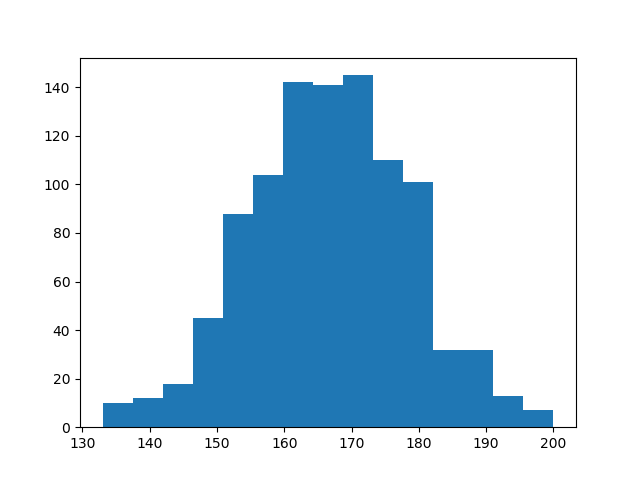

(array([ 10.,  12.,  18.,  45.,  88., 104., 142., 141., 145., 110., 101.,
         32.,  32.,  13.,   7.]),
 array([133.        , 137.46666667, 141.93333333, 146.4       ,
        150.86666667, 155.33333333, 159.8       , 164.26666667,
        168.73333333, 173.2       , 177.66666667, 182.13333333,
        186.6       , 191.06666667, 195.53333333, 200.        ]),
 <a list of 15 Patch objects>)

In [9]:
fig, ax = plt.subplots()
ax.hist(results, bins=15)

In [10]:
results.mean()

166.752

In [11]:
1000 - results.mean()

833.248

In [12]:
results.mean() / 1000

0.166752

In [13]:
d1 = np.arange(1, 7)
d2 = np.arange(1, 7)

In [14]:
d1

array([1, 2, 3, 4, 5, 6])

In [15]:
d2

array([1, 2, 3, 4, 5, 6])

In [16]:
mat = np.add.outer(d1, d2)

In [17]:
mat

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12]])

In [18]:
mat.size #total probabilties

36

In [45]:
mat[mat==7].size #probability of coming onlt 7

6

In [23]:

mat  = mat[mat==7].size / mat.size #probality in perce

In [27]:
print(round(mat, 2)*100,'%')

17.0 %


# Monte carlo simulation with portfolios and sharpe ratio

In [31]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [32]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [33]:
data.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        MSFT       TWTR         IBM       AAPL   
Date                                                                  
2019-12-31  72.245934  154.430435  32.049999  114.547295  73.412498   
2020-01-02  73.894318  157.289871  32.299999  115.726624  75.087502   
2020-01-03  73.175934  155.331375  31.520000  114.803680  74.357498   
2020-01-06  73.759010  155.732834  31.639999  114.598587  74.949997   
2020-01-07  73.412125  154.312897  32.540001  114.675476  74.597504   

Attributes                                          High              ...  \
Symbols           MSFT       TWTR         IBM       AAPL        MSFT  ...   
Date                                                                  ...   
2019-12-31  157.699997  32.049999  128.145309  73.419998  157.770004  ...   
2020-01-02  160.619995  32.299999  129.464630  75.150002  160.729996  ...   
2020-01-03  158.619995  31.520000  128.432129  75.144997  159.949997  ...   
2020-01-06  159.029999  31.639999  128.202682  74.989998  159.100006  ...   
2020-01-07  157.580002  32.540001  128.288712  75.224998  159.669998  ...   

Attributes        Low                   Open                         \
Symbols          TWTR         IBM       AAPL        MSFT       TWTR   
Date                                                                  
2019-12-31  31.770000  126.577438  72.482498  156.770004  31.860001   
2020-01-02  31.959999  128.843216  74.059998  158.779999  32.310001   
2020-01-03  31.260000  127.686424  74.287498  158.320007  31.709999   
2020-01-06  31.160000  127.342255  73.447502  157.080002  31.230000   
2020-01-07  31.719999  127.533463  74.959999  159.320007  31.799999   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2019-12-31  126.701721  100805600.0  18369400.0  11050600.0  3951265.0  
2020-01-02  129.063095  135480400.0  22622100.0  10721100.0  3293436.0  
2020-01-03  127.695984  146322800.0  21116200.0  14429500.0  2482890.0  
2020-01-06  127.552582  118387200.0  20813700.0  12582500.0  2537073.0  
2020-01-07  127.810707  108872000.0  21634100.0  13712900.0  3232977.0  

[5 rows x 24 columns]

In [34]:
data = data['Adj Close']

In [35]:
data

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2019-12-31,72.245934,154.430435,32.049999,114.547295
2020-01-02,73.894318,157.289871,32.299999,115.726624
2020-01-03,73.175934,155.331375,31.520000,114.803680
2020-01-06,73.759010,155.732834,31.639999,114.598587
2020-01-07,73.412125,154.312897,32.540001,114.675476
...,...,...,...,...
2022-02-10,172.119995,301.756073,37.080002,133.520004
2022-02-11,168.639999,294.431213,35.840000,132.690002
2022-02-14,168.880005,294.391296,35.689999,130.149994


In [36]:
log_returns = np.log(data/data.shift())

In [37]:
log_returns

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2019-12-31,NaN,NaN,NaN,NaN
2020-01-02,0.022560,0.018347,0.007770,0.010243
2020-01-03,-0.009769,-0.012530,-0.024445,-0.008007
2020-01-06,0.007937,0.002581,0.003800,-0.001788
2020-01-07,-0.004714,-0.009160,0.028048,0.000671
...,...,...,...,...
2022-02-10,-0.023882,-0.028783,-0.020025,-0.019506
2022-02-11,-0.020426,-0.024574,-0.034013,-0.006236
2022-02-14,0.001422,-0.000136,-0.004194,-0.019328


In [38]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.316566  , 0.32312359, 0.06261716, 0.29769325])

In [39]:
exp_rtn = np.sum(log_returns.mean()*weight)*252 #stock market counts 253 days as yearly

In [40]:
exp_rtn

0.25017703516354994

In [53]:
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))

In [54]:
sharpe_ratio = exp_rtn/exp_vol

In [55]:
sharpe_ratio

0.840765075082837

In [58]:
#monte carlo simulation
n = 5000
weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /=weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [60]:
sharpe_ratios.max()

1.0730591170784753

In [61]:
sharpe_ratios.argmax()

843

In [62]:
weights[843]

array([0.67281214, 0.27940253, 0.00318056, 0.04460478])

In [64]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


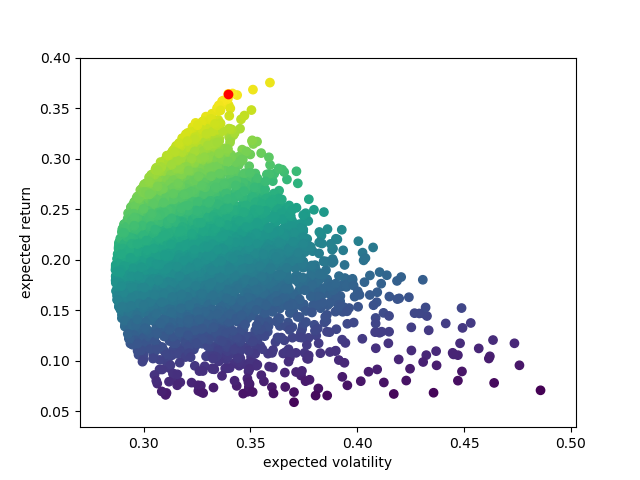

Text(0, 0.5, 'expected return')

In [68]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='red')
ax.set_xlabel('expected volatility')
ax.set_ylabel('expected return')